# Part 1: Data Loading & Inspection

1. Load the CSV file.

2. Display the first 10 rows.

3. Check dataset shape, column names, and data types.

4. Identify missing values.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv('GlobalLandTemperaturesByCountry.csv')
print(df.head(10))

           dt  AverageTemperature  AverageTemperatureUncertainty Country
0  1743-11-01               4.384                          2.294   Åland
1  1743-12-01                 NaN                            NaN   Åland
2  1744-01-01                 NaN                            NaN   Åland
3  1744-02-01                 NaN                            NaN   Åland
4  1744-03-01                 NaN                            NaN   Åland
5  1744-04-01               1.530                          4.680   Åland
6  1744-05-01               6.702                          1.789   Åland
7  1744-06-01              11.609                          1.577   Åland
8  1744-07-01              15.342                          1.410   Åland
9  1744-08-01                 NaN                            NaN   Åland


In [3]:
df.shape

(577462, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [5]:
df.columns

Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'Country'], dtype='object')

In [6]:
df.isnull().sum()

dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64

#  Part 2: Data Cleaning

1. Convert the dt column to datetime format.

2. Convert column names to snake_case (dt, average_temperature,
average_temperature_uncertainty, country).

3. Remove rows with missing values in AverageTemperature .

4. Filter data to include years after 1950.

In [7]:
df['dt'] = pd.to_datetime(df['dt'])

In [8]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
print(df.columns)

Index(['dt', 'averagetemperature', 'averagetemperatureuncertainty', 'country'], dtype='object')


In [9]:
df.columns = [
    "dt",
    "average_temperature",
    "average_temperature_uncertainty",
    "country"
]

In [10]:
df.dropna(subset=['average_temperature'])

,dt,average_temperature,average_temperature_uncertainty,country
0,1743-11-01,4.384,2.294,Åland
5,1744-04-01,1.530,4.680,Åland
6,1744-05-01,6.702,1.789,Åland
7,1744-06-01,11.609,1.577,Åland
8,1744-07-01,15.342,1.410,Åland
...,...,...,...,...
577456,2013-04-01,21.142,0.495,Zimbabwe
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe


In [11]:
df = df[df['dt'].dt.year > 1950]
print(df)

               dt  average_temperature  average_temperature_uncertainty  \
2486   1951-01-01               -3.433                            0.527   
2487   1951-02-01               -2.421                            0.662   
2488   1951-03-01               -4.199                            0.558   
2489   1951-04-01                2.424                            0.470   
2490   1951-05-01                5.322                            0.616   
...           ...                  ...                              ...   
577457 2013-05-01               19.059                            1.022   
577458 2013-06-01               17.613                            0.473   
577459 2013-07-01               17.000                            0.453   
577460 2013-08-01               19.759                            0.717   
577461 2013-09-01                  NaN                              NaN   

         country  
2486       Åland  
2487       Åland  
2488       Åland  
2489       Åland  
2490

# Part 3: Statistical Analysis (NumPy)
Calculate:

Mean AverageTemperature per country

Minimum and maximum values of AverageTemperature

Identify the hottest and coldest years globally.

In [12]:
print(np.mean(df['average_temperature']))

19.00301119200022


In [13]:
print(np.min(df['average_temperature']))
print(np.max(df['average_temperature']))

-36.332
38.84200000000001


In [14]:
hottest_years = df.groupby(df['dt'].dt.year)['average_temperature'].max().sort_values(ascending=False).head(5)
print(hottest_years.head())

dt
2012    38.842
2000    38.705
2010    38.495
1998    38.436
2013    38.234
Name: average_temperature, dtype: float64


In [15]:
coldest_years = df.groupby(df['dt'].dt.year)['average_temperature'].min().sort_values(ascending=False).head(5)
print(hottest_years.head())

dt
2012    38.842
2000    38.705
2010    38.495
1998    38.436
2013    38.234
Name: average_temperature, dtype: float64


# Part 4: Grouping & Aggregation

1. Group data by Country and calculate:
Average of AverageTemperature
Standard deviation of AverageTemperature

2. Select 5 countries and compare their average temperatures

In [16]:
df.groupby('country')['average_temperature'].mean()

country
Afghanistan       14.532793
Africa            24.437828
Albania           13.037580
Algeria           23.511991
American Samoa    26.934762
                    ...    
Western Sahara    22.815806
Yemen             26.568339
Zambia            21.602983
Zimbabwe          21.452914
Åland              5.817158
Name: average_temperature, Length: 243, dtype: float64

In [17]:
countries = ['United States', 'India', 'Brazil', 'China', 'Australia']

df_5 = df[df['country'].isin(countries)]

avg_temp = (
    df_5
    .groupby('country')['average_temperature']
    .mean()
)
avg_temp = avg_temp.sort_values()

print(avg_temp)


country
China             7.100085
United States     9.133700
Australia        21.960277
India            24.347207
Brazil           25.182622
Name: average_temperature, dtype: float64


# Part 5: Data Visualization

Create the following visualizations:
1. Line plot: AverageTemperature change over time ( dt ) for one country.

2. Line plot: compare AverageTemperature trends of multiple countries over
time.

3. Histogram: distribution of AverageTemperature .

4. Boxplot: AverageTemperature variation by Country .

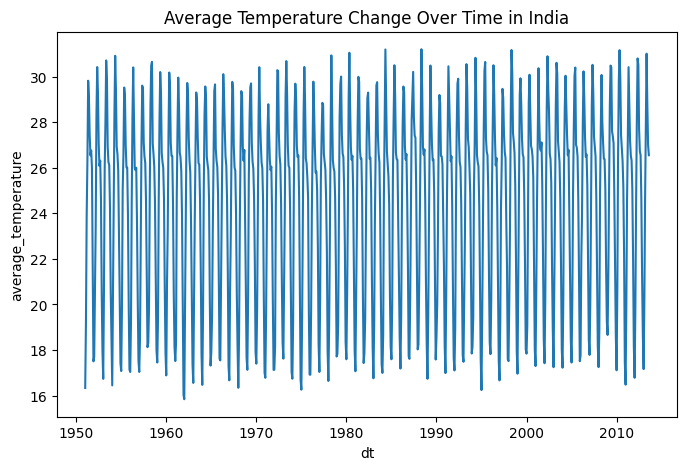

In [18]:
country_df = df[df['country'] == 'India']

plt.figure(figsize=(8,5))
plt.plot(country_df['dt'], country_df['average_temperature'])

plt.title("Average Temperature Change Over Time in India")
plt.xlabel('dt')
plt.ylabel('average_temperature')

plt.show()

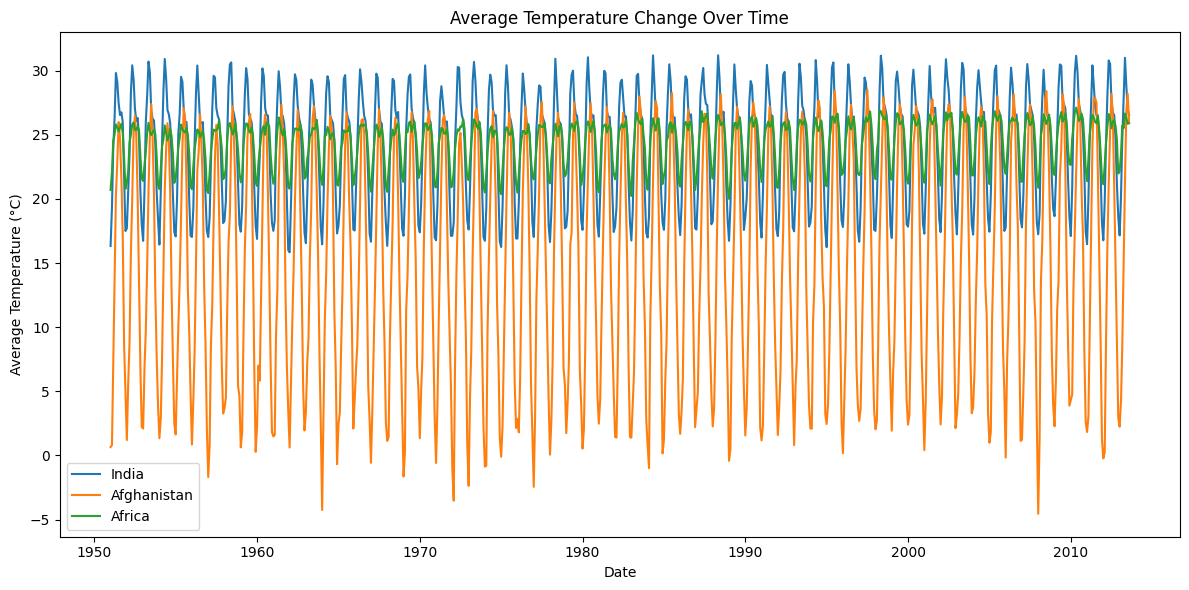

In [20]:
country_df = df[df['country'].isin(['India', 'Afghanistan', 'Africa'])]

plt.figure(figsize=(12,6))
for country in ['India', 'Afghanistan', 'Africa']:
	temp_data = country_df[country_df['country'] == country]
	plt.plot(temp_data['dt'], temp_data['average_temperature'], label=country)

plt.title("Average Temperature Change Over Time")
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.legend()
plt.tight_layout()

plt.show()

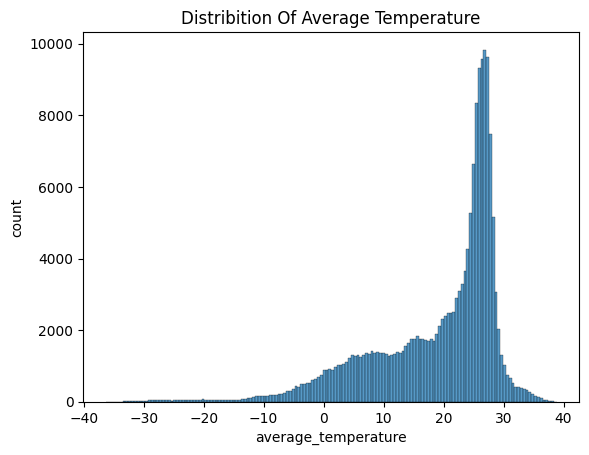

In [22]:
plt.Figure(figsize=(8,5))
sns.histplot(data=df, x = 'average_temperature')
plt.title("Distribition Of Average Temperature")
plt.xlabel('average_temperature')
plt.ylabel('count')

plt.show()

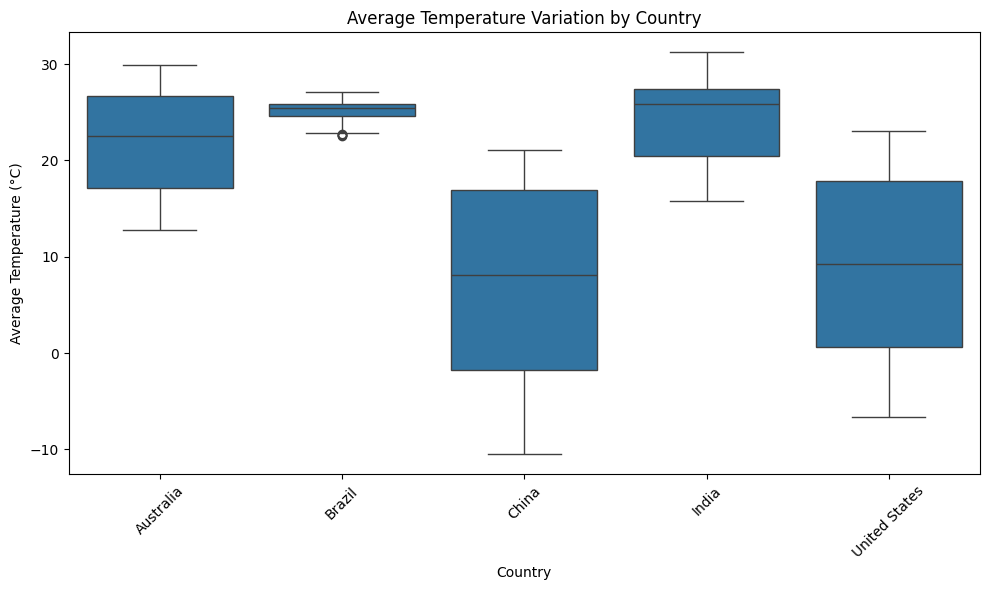

In [25]:
# 4. Boxplot: AverageTemperature variation by Country .

countries_list = ['United States', 'India', 'Brazil', 'China', 'Australia']
country_df = df[df['country'].isin(countries_list)]

plt.figure(figsize=(10,6))
sns.boxplot(data=country_df, x='country', y='average_temperature')

plt.title("Average Temperature Variation by Country")
plt.xlabel('Country')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()